In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_excel('/content/BaseDados_RegressaoLogistica.xlsx')

In [3]:
dados

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0
...,...,...,...,...,...
95,96,3238,1,2,0
96,97,10701,1,2,1
97,98,14732,1,2,0
98,99,4790,1,2,1


In [4]:
dados.shape

(100, 5)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [6]:
dados.describe()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


In [7]:
dados.isnull().sum()

Id Cliente       0
Renda            0
Tipo Renda       0
Possui Imóvel    0
Comprou?         0
dtype: int64

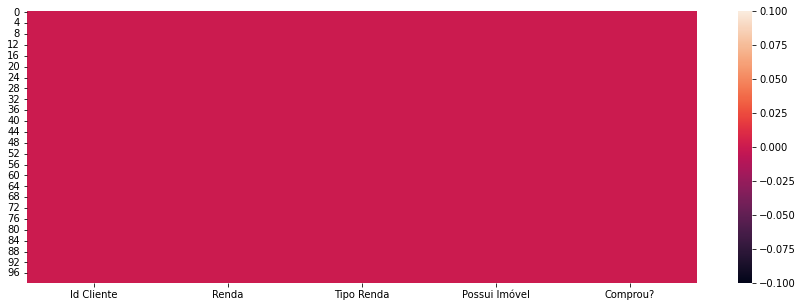

In [10]:
plt.figure( figsize=(15,5))
sns.heatmap( dados.isnull() );

In [12]:
#COLUNA TIPO RENDA, DADOS CATEGÓRICOS
#1 - ASSALARIADO
#2 - AUTONOMO
#3 - EMPRESÁRIO

In [13]:
#POSSUI IMOVEL
# 1 - SIM
# 2 - Nao

In [14]:
#comprou?
# 1 - sim
# 0 - nao

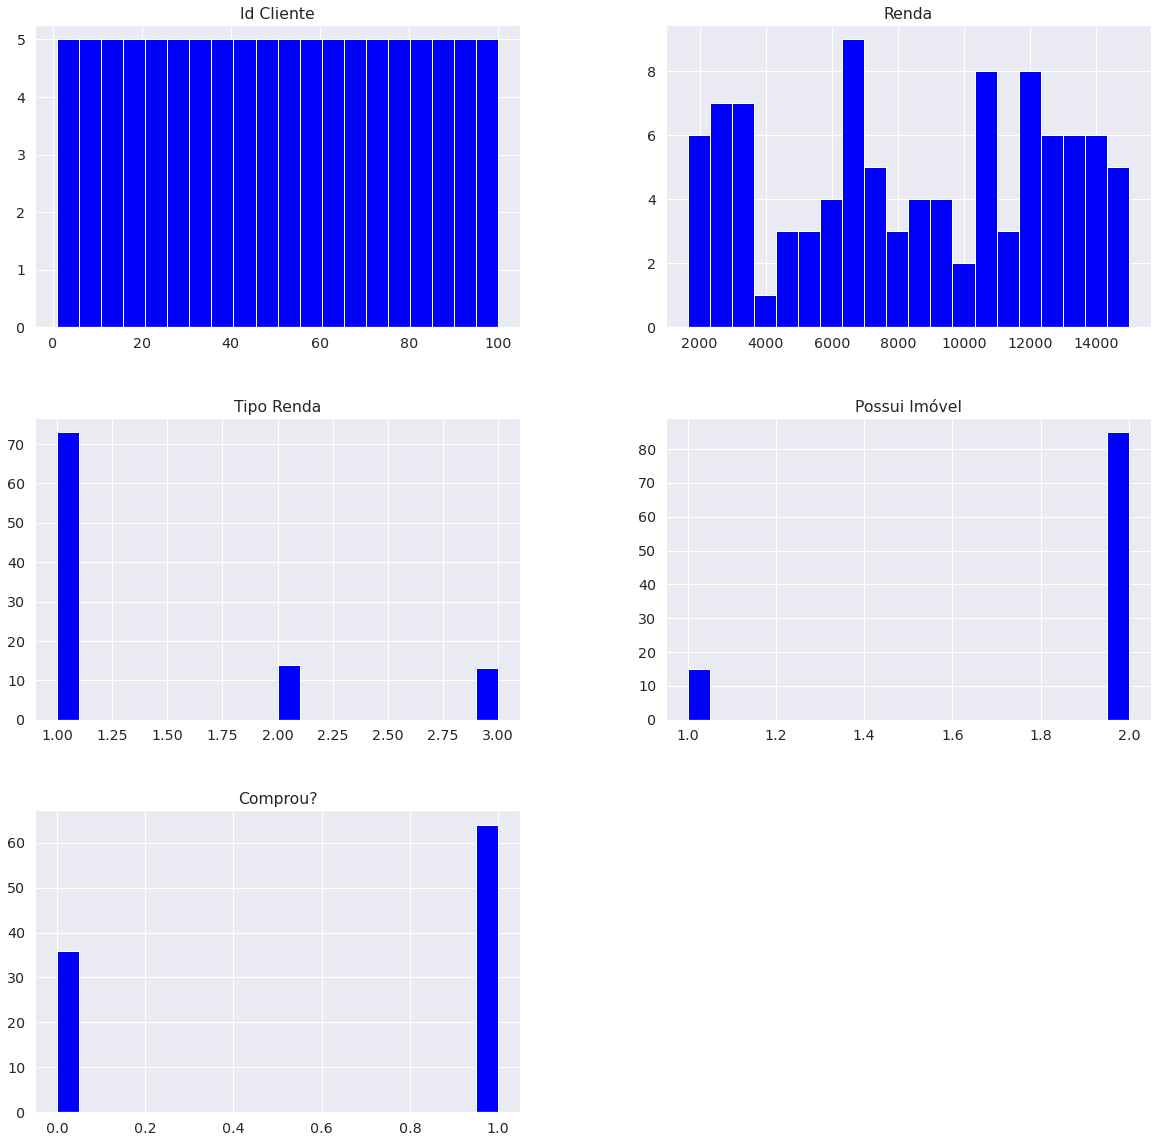

In [15]:
sns.set( font_scale = 1.3, rc = {'figure.figsize': (20, 20)} )
eixo = dados.hist( bins=20, color='blue')

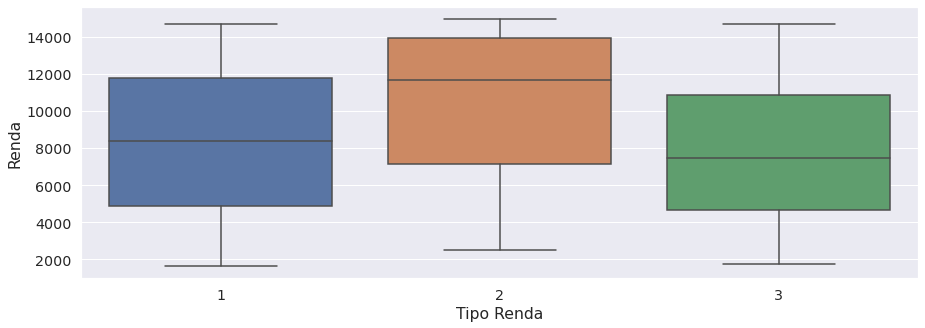

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(data=dados, x='Tipo Renda', y='Renda');

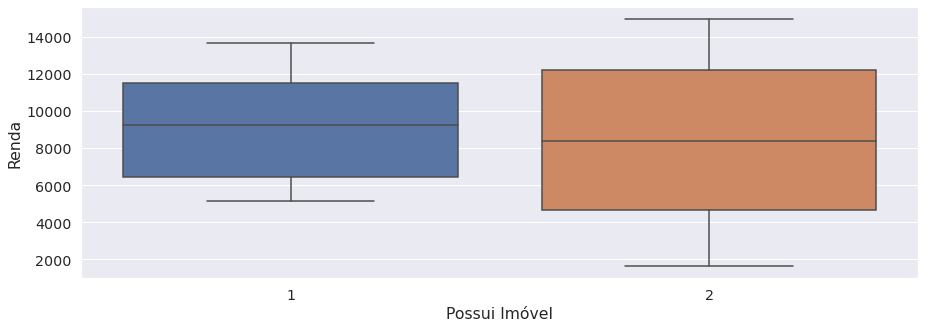

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=dados, x='Possui Imóvel', y='Renda')

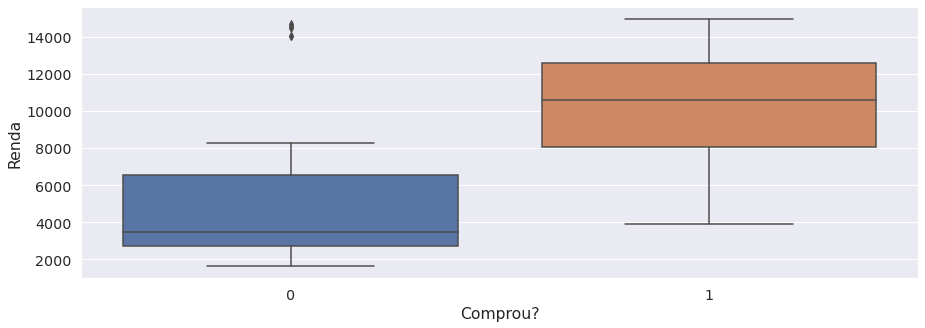

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(data=dados, x='Comprou?', y='Renda');

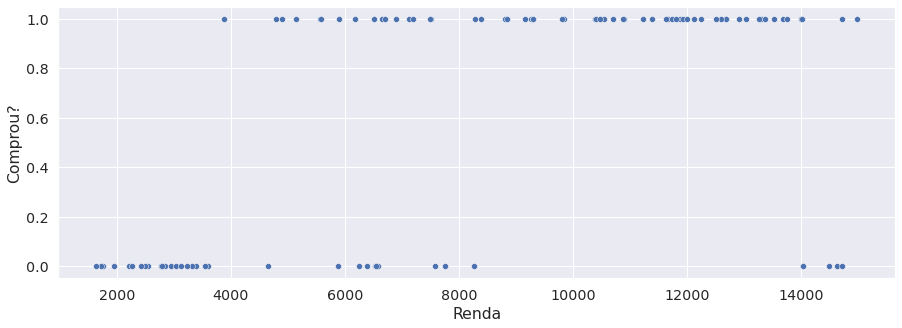

In [31]:
#fica claro a regressão logistica
plt.figure( figsize=(15,5) )
sns.scatterplot(data=dados, x='Renda', y='Comprou?')

In [32]:
dados.head()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0


In [34]:
X = dados.iloc[:, 1:4].values

In [36]:
y = dados['Comprou?']

In [37]:
X

array([[10480,     1,     2],
       [ 6182,     2,     2],
       [ 6387,     3,     1],
       [ 6528,     1,     2],
       [ 8269,     1,     2],
       [ 6903,     1,     2],
       [ 1947,     1,     2],
       [14008,     1,     2],
       [ 2213,     1,     2],
       [13321,     2,     2],
       [14043,     3,     2],
       [ 5561,     1,     2],
       [11890,     1,     2],
       [13308,     1,     2],
       [11666,     1,     2],
       [ 3395,     1,     2],
       [ 8854,     2,     2],
       [ 1760,     3,     2],
       [ 7761,     1,     2],
       [ 2952,     1,     2],
       [ 4904,     1,     2],
       [ 2262,     1,     2],
       [13274,     1,     2],
       [ 2546,     1,     2],
       [10393,     2,     2],
       [10901,     3,     2],
       [ 9271,     1,     1],
       [11230,     1,     1],
       [12908,     1,     1],
       [ 6543,     1,     1],
       [11742,     1,     2],
       [ 6578,     2,     2],
       [10555,     3,     1],
       [ 8

In [38]:
y

0     1
1     1
2     0
3     0
4     0
     ..
95    0
96    1
97    0
98    1
99    1
Name: Comprou?, Length: 100, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
funcao_logistica = LogisticRegression()

In [43]:
funcao_logistica.fit(X_treino, y_treino)

LogisticRegression()

In [44]:
previsoes = funcao_logistica.predict( X_teste)
previsoes

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [46]:
y_teste.values

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix( y_teste, previsoes)

array([[ 4,  3],
       [ 1, 12]])

In [49]:
from sklearn.metrics import classification_report

In [52]:
#classificacao do modelo pelo "classification_report"
print(classification_report( y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.80      0.92      0.86        13

    accuracy                           0.80        20
   macro avg       0.80      0.75      0.76        20
weighted avg       0.80      0.80      0.79        20



In [53]:
#novo cliente para venda de imóvel
Salario = 4500
Tipo_Renda = 1
Possui_Imovel = 1

Parametro = [[Salario, Tipo_Renda, Possui_Imovel]]

Fazendo_previsao = funcao_logistica.predict(Parametro)

In [54]:
Fazendo_previsao

array([1])

In [55]:
#pela resposta de cima, 1 é comprou

In [56]:
#testando a probabilidade de comprar ser verdaedeira
probabilidade = funcao_logistica.predict_proba(Parametro)

In [57]:
probabilidade

array([[0.45229054, 0.54770946]])

In [58]:
#lendo a resposta de cima
# 45% de não comprar e 54% de comprar